In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Ocean Wave Forecasting (Australia Ocean)

*  Loading Data


In [90]:
df = pd.read_csv('Coastal Data System - Waves (Mooloolaba) 01-2017 to 06 - 2019.csv')
df.head()

,Date/Time,Hs,Hmax,Tz,Tp,Peak Direction,SST
0,01/01/2017 00:00,-99.900,-99.90,-99.900,-99.900,-99.9,-99.90
1,01/01/2017 00:30,0.875,1.39,4.421,4.506,-99.9,-99.90
2,01/01/2017 01:00,0.763,1.15,4.520,5.513,49.0,25.65
3,01/01/2017 01:30,0.770,1.41,4.582,5.647,75.0,25.50
4,01/01/2017 02:00,0.747,1.16,4.515,5.083,91.0,25.45


In [5]:
# Deleting NaN values
df.replace(-99.90, np.nan, inplace=True)
df.drop('Date/Time', axis=1, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,Hs,Hmax,Tz,Tp,Peak Direction,SST
0,0.763,1.15,4.520,5.513,49.0,25.65
1,0.770,1.41,4.582,5.647,75.0,25.50
2,0.747,1.16,4.515,5.083,91.0,25.45
3,0.718,1.61,4.614,6.181,68.0,25.45
4,0.707,1.34,4.568,4.705,73.0,25.50


* Visualization Features

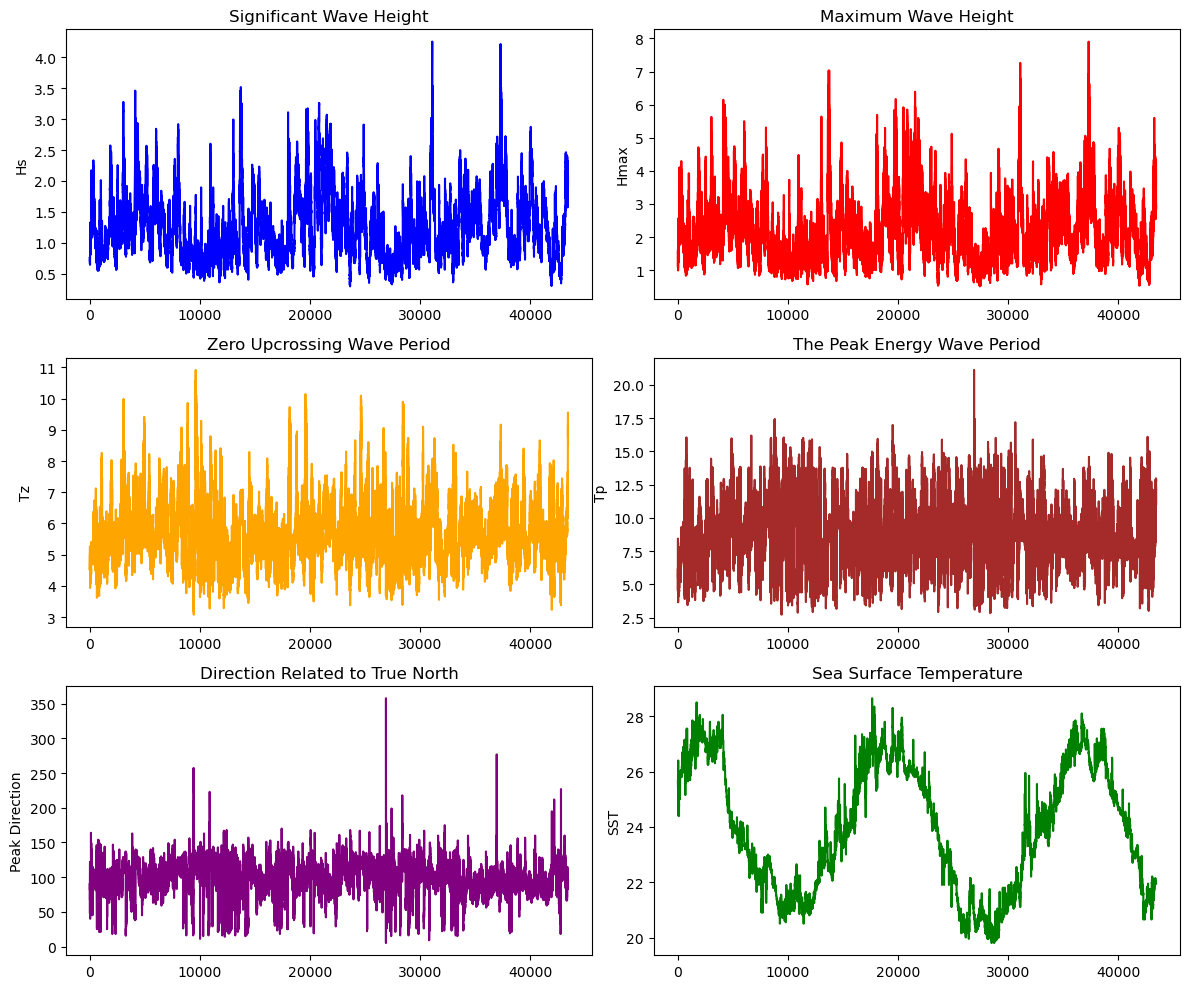

In [7]:
# Membuat figure dan subplot
fig, axes = plt.subplots(3, 2, figsize=(12, 10))  # 3 baris, 2 kolom

# Plot untuk setiap variabel
axes[0, 0].plot(df.index, df['Hs'], color='blue')
axes[0, 0].set_title('Significant Wave Height')
axes[0, 0].set_ylabel('Hs')

axes[0, 1].plot(df.index, df['Hmax'], color='red')
axes[0, 1].set_title('Maximum Wave Height')
axes[0, 1].set_ylabel('Hmax')

axes[1, 0].plot(df.index, df['Tz'], color='orange')
axes[1, 0].set_title('Zero Upcrossing Wave Period')
axes[1, 0].set_ylabel('Tz')

axes[1, 1].plot(df.index, df['Tp'], color='brown')
axes[1, 1].set_title('The Peak Energy Wave Period')
axes[1, 1].set_ylabel('Tp')

axes[2, 0].plot(df.index, df['Peak Direction'], color='purple')
axes[2, 0].set_title('Direction Related to True North')
axes[2, 0].set_ylabel('Peak Direction')

axes[2, 1].plot(df.index, df['SST'], color='green')
axes[2, 1].set_title('Sea Surface Temperature')
axes[2, 1].set_ylabel('SST')

# Menyesuaikan layout
plt.tight_layout()
plt.show()

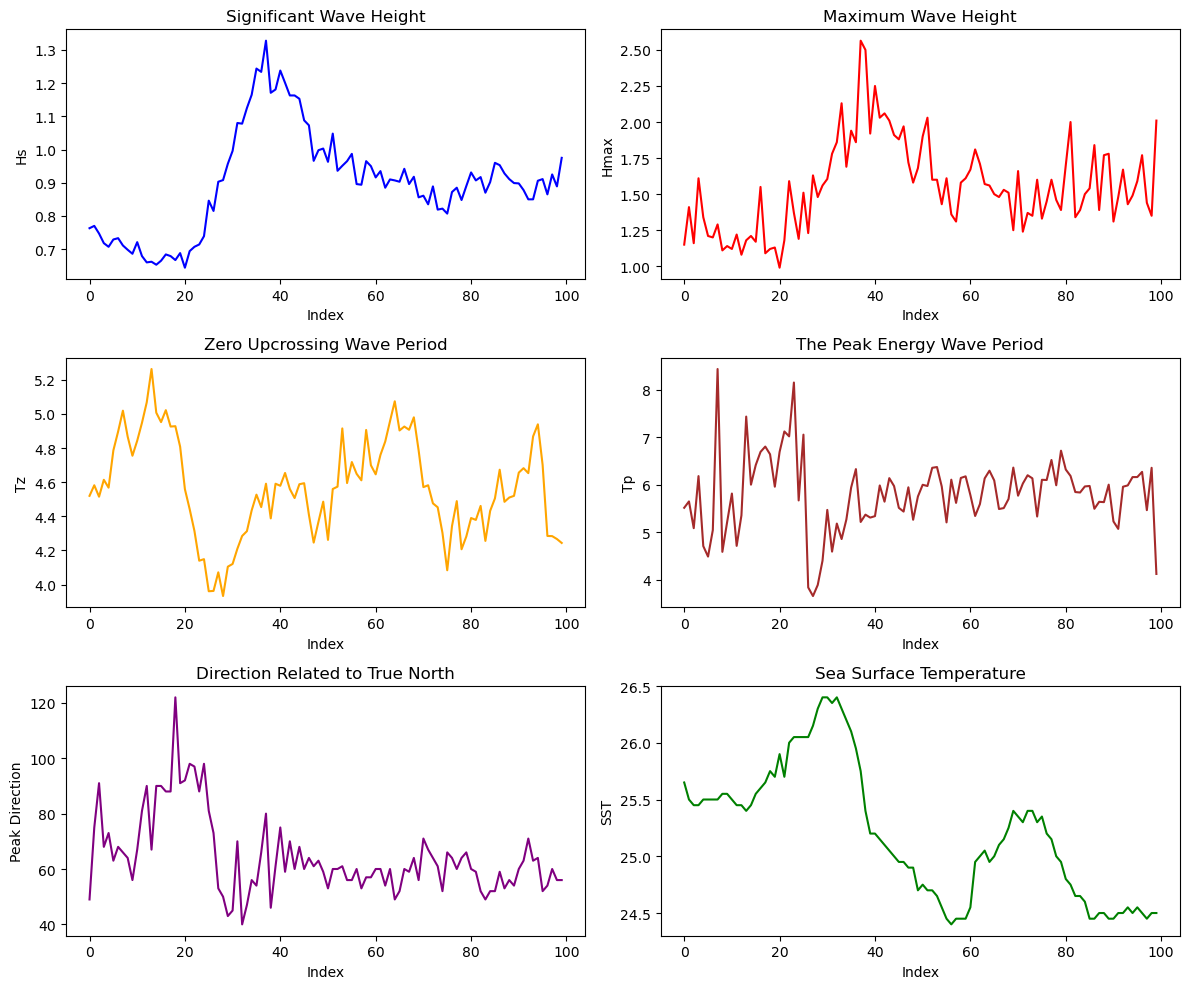

In [8]:
# Memilih data untuk 100 baris pertama
df_subset = df.iloc[:100]

# Membuat figure dan subplot
fig, axes = plt.subplots(3, 2, figsize=(12, 10))  # 3 baris, 2 kolom

# Plot untuk setiap variabel
axes[0, 0].plot(range(len(df_subset)), df_subset['Hs'], color='blue')
axes[0, 0].set_title('Significant Wave Height')
axes[0, 0].set_ylabel('Hs')
axes[0, 0].set_xlabel('Index')

axes[0, 1].plot(range(len(df_subset)), df_subset['Hmax'], color='red')
axes[0, 1].set_title('Maximum Wave Height')
axes[0, 1].set_ylabel('Hmax')
axes[0, 1].set_xlabel('Index')

axes[1, 0].plot(range(len(df_subset)), df_subset['Tz'], color='orange')
axes[1, 0].set_title('Zero Upcrossing Wave Period')
axes[1, 0].set_ylabel('Tz')
axes[1, 0].set_xlabel('Index')

axes[1, 1].plot(range(len(df_subset)), df_subset['Tp'], color='brown')
axes[1, 1].set_title('The Peak Energy Wave Period')
axes[1, 1].set_ylabel('Tp')
axes[1, 1].set_xlabel('Index')

axes[2, 0].plot(range(len(df_subset)), df_subset['Peak Direction'], color='purple')
axes[2, 0].set_title('Direction Related to True North')
axes[2, 0].set_ylabel('Peak Direction')
axes[2, 0].set_xlabel('Index')

axes[2, 1].plot(range(len(df_subset)), df_subset['SST'], color='green')
axes[2, 1].set_title('Sea Surface Temperature')
axes[2, 1].set_ylabel('SST')
axes[2, 1].set_xlabel('Index')

# Menyesuaikan layout
plt.tight_layout()
plt.show()


* Data Exploration 

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43454 entries, 0 to 43453
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hs              43454 non-null  float64
 1   Hmax            43454 non-null  float64
 2   Tz              43454 non-null  float64
 3   Tp              43454 non-null  float64
 4   Peak Direction  43454 non-null  float64
 5   SST             43454 non-null  float64
dtypes: float64(6)
memory usage: 2.0 MB
None


In [11]:
df.describe()

,Hs,Hmax,Tz,Tp,Peak Direction,SST
count,43454.000000,43454.000000,43454.000000,43454.000000,43454.000000,43454.000000
mean,1.237799,2.090125,5.619685,9.011972,98.626594,23.949641
std,0.528608,0.897640,0.928533,2.390107,24.275165,2.231022
min,0.294000,0.510000,3.076000,2.720000,5.000000,19.800000
25%,0.839000,1.410000,4.981000,7.292000,85.000000,21.900000
50%,1.130000,1.900000,5.530000,8.886000,101.000000,23.950000
75%,1.544000,2.600000,6.166000,10.677000,116.000000,26.050000
max,4.257000,7.906000,10.921000,21.121000,358.000000,28.650000


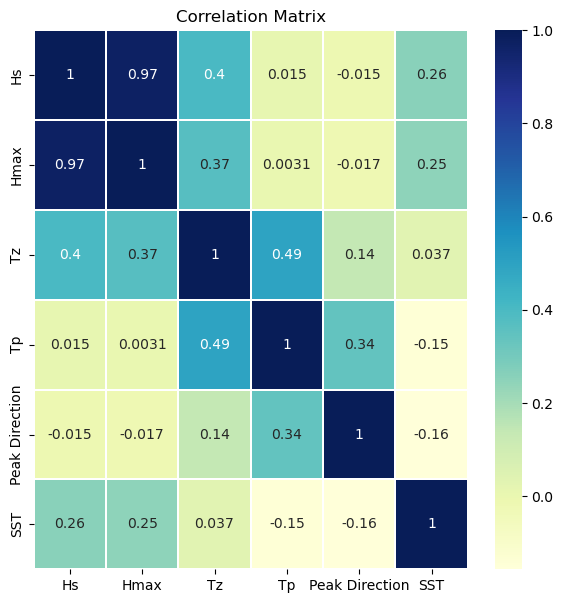

In [12]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), linewidth=.1, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show();

Dapat dilihat bahwa Hs dan Hmax memiliki korelasi positif yang cukup tinggi yaitu 0.97 atau 97%. Lalu, disusul oleh Tz dan Tp yang memiliki korelasi positif sebesar 0.49 atau 49%. Terakhir, Peak Direction dan Tp dengan korelasi positif 0.34 atau 34%.

Lalu, untuk korelasi negatif paling besar dipegang oleh Peak Direction dengan SST dan disusul SST dengan Tp dengan korelasi negatif beruturut-turut sebesar 0.16 atau 16% dan 0.15 atau 15%.

* Features Scalling

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Scaling all the values between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(df)
print('Shape of the scaled data matrix: ', data.shape)

Shape of the scaled data matrix:  (43454, 6)


* Train Test Splitting

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Misalkan df adalah DataFrame Anda
# Pilih hanya kolom Hs dan Hmax
data = df[['Hs', 'Hmax']]

# Scaling semua nilai antara 0 dan 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Pisahkan data menjadi 2 kelompok untuk train dan test
train = scaled_data[:42000, ]
test = scaled_data[42000:, ]

# Cetak bentuk dataset
print('Shape of train data: ', train.shape)
print('Shape of test data: ', test.shape)

Shape of train data:  (42000, 2)
Shape of test data:  (1454, 2)


In [18]:
def prepare_data(data):
    # Menentukan ukuran batch data yang akan dijadikan input
    databatch = 30
    x_list = []  # List untuk menyimpan data input
    y_list = []  # List untuk menyimpan data output

    # Menggeser jendela sepanjang data untuk membuat pasangan input-output
    for i in range(len(data) - databatch - 1):
        # Menyimpan 30 sampel sebagai input dari data urut mulai dari indeks i
        x_list.append(data[i:i + databatch])
        # Menyimpan sampel ke-31 sebagai output (y) setelah jendela input
        y_list.append(data[i + databatch + 1])

    # Mengonversi list input menjadi array NumPy
    X_data = np.array(x_list)
    # Menyesuaikan bentuk array agar sesuai dengan dimensi yang dibutuhkan oleh model
    X_data = np.reshape(X_data, (X_data.shape[0], X_data.shape[2], X_data.shape[1]))  # Ubah dimensi menjadi (jumlah_batch, jumlah_fitur, ukuran_batch)
    
    # Mengonversi list output menjadi array NumPy
    y_data = np.array(y_list)

    # Mengembalikan data input dan output dalam bentuk array NumPy
    return X_data, y_data


In [19]:
X_train, y_train = prepare_data(train)
X_test, y_test = prepare_data(test)
print('X_train Shape : ', X_train.shape, 'y_train shape :', y_train.shape)
print('X_test Shape  : ', X_test.shape, ' y_test shape  :', y_test.shape)

X_train Shape :  (41969, 2, 30) y_train shape : (41969, 2)
X_test Shape  :  (1423, 2, 30)  y_test shape  : (1423, 2)


In [20]:
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)


* XGBoost Regressor

In [30]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


def xgboost_model(x_data, y_data, num_trees=100, max_depth=None):
    X_train, X_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.25, random_state=42)

    model = XGBRegressor(n_estimators=num_trees, max_depth=max_depth, random_state=42)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    mse = mean_squared_error(y_val, y_pred)
    print(f"Validation Mean Squared Error (XGBoost): {mse}")

    return model, mse


history2 = xgboost_model(X_train_reshaped, y_train, num_trees=100, max_depth=None)

Validation Mean Squared Error (XGBoost): 0.0008652565845775577


Hasil optimasi Bayesian : Validation MSE: 0.0008376342170424618

Hasil optimasi PSO : Validation MSE: 0.0008295040936167992

Hasil optimasi SDO : Validation MSE:  0.0008355823012330992

Optimasi paling optimal : **PSO**

In [32]:

def predicting2(data, y_real):
    predicted_data = history2[0].predict(data)
    # Invert scaling process to get the normal values range for the features
    predicted_data = scaler.inverse_transform(predicted_data)
    y_real = scaler.inverse_transform(y_real)

    return predicted_data, y_real

In [34]:

train_prediction2, y_train2 = predicting2(X_train_reshaped, y_train)
test_prediction2, y_test2 = predicting2(X_test_reshaped, y_test)

In [36]:
# Defining function to investigate the root of mean squared errors (RMSE) between predicted and real data

import math
from sklearn.metrics import mean_squared_error

def examine_rmse(y_data, predicted_data):
    Score_Hs = math.sqrt(mean_squared_error(y_data[:,0], predicted_data[:,0]))
    Score_Hmax = math.sqrt(mean_squared_error(y_data[:,1], predicted_data[:,1]))
 
    print('RMSE_Hs       : ', Score_Hs)
    print('RMSE_Hmax     : ', Score_Hmax)
  

In [38]:
# Executing the RMSE comparison
print('Trainin Data Errors')
print(examine_rmse(y_train2, train_prediction2),'\n')
print('Test Data Errors')
print(examine_rmse(y_test2, test_prediction2))

Trainin Data Errors
RMSE_Hs       :  0.0678917211214244
RMSE_Hmax     :  0.1998001799412277
None 

Test Data Errors
RMSE_Hs       :  0.07688399916176855
RMSE_Hmax     :  0.24402999762644925
None


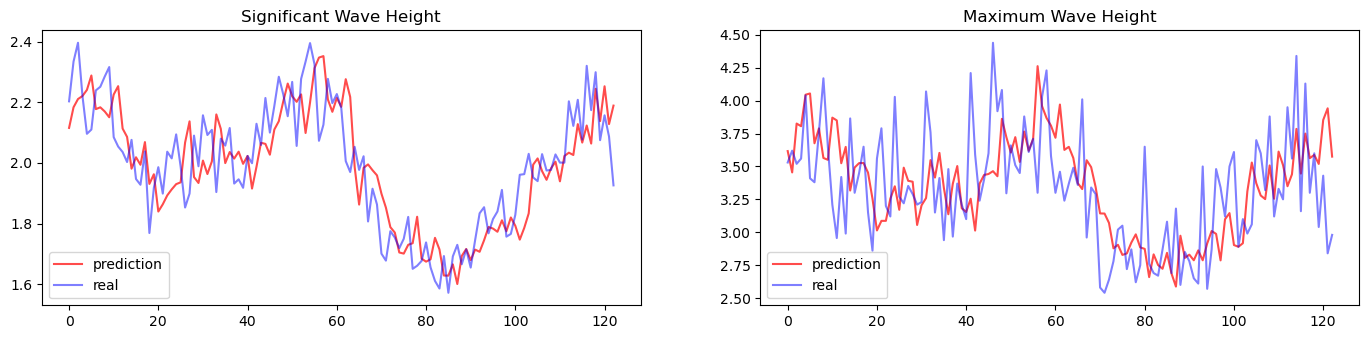

In [40]:
plt.figure(figsize=(17,25))


plt.subplot(6,2,1)
plt.plot(test_prediction2[1300:,0], color='red', alpha=0.7, label='prediction')
plt.plot(y_test2[1300:,0], color='blue', alpha=0.5, label='real')
plt.title('Significant Wave Height')
plt.legend()


plt.subplot(6,2,2)
plt.plot(test_prediction2[1300:,1], color='red', alpha=0.7, label='prediction')
plt.plot(y_test2[1300:,1], color='blue', alpha=0.5, label='real')
plt.title('Maximum Wave Height')
plt.legend()

* Hyperparameter Tunning

### Uji Coba Optimasi Numerik terhadap XGBoost

> Bayesian Optimization

In [45]:
from skopt import gp_minimize
from skopt.space import Integer
import numpy as np

# Fungsi objektif menggunakan random_forest_model
def objective_function(params):
    n_estimators = int(params[0])  # Jumlah pohon
    max_depth = int(params[1]) if params[1] > 0 else None  # Kedalaman maksimum

    # Menggunakan random_forest_model dengan parameter baru
    _, mse = xgboost_model(X_train_reshaped, y_train, num_trees=n_estimators, max_depth=max_depth)

    return mse

# Ruang pencarian hyperparameter
search_space = [
    Integer(10, 200, name='n_estimators'),  # Pencarian antara 10 hingga 200 pohon
    Integer(1, 20, name='max_depth')        # Pencarian antara kedalaman 1 hingga 20
]

# Menggunakan Bayesian Optimization (gp_minimize)
result = gp_minimize(
    func=objective_function,
    dimensions=search_space,
    n_calls=5,            # Jumlah iterasi pencarian
    random_state=42,       # Seed untuk reproducibility
    n_initial_points=5     # Jumlah titik awal random sebelum menggunakan model Bayesian
)

# Menampilkan hasil optimasi
optimal_n_estimators = result.x[0]
optimal_max_depth = result.x[1]
best_mse = result.fun

print("Hyperparameter optimal:")
print(f"  n_estimators: {optimal_n_estimators}")
print(f"  max_depth: {optimal_max_depth}")
print(f"  Validation MSE: {best_mse}")


Validation Mean Squared Error (XGBoost): 0.0008441702001236253
Validation Mean Squared Error (XGBoost): 0.000956249631770381
Validation Mean Squared Error (XGBoost): 0.0008376342170424618
Validation Mean Squared Error (XGBoost): 0.0008863816602509966
Validation Mean Squared Error (XGBoost): 0.0009466483259504032
Hyperparameter optimal:
  n_estimators: 95
  max_depth: 3
  Validation MSE: 0.0008376342170424618


> Particle Swarm Optimization

In [47]:
from pyswarm import pso
import numpy as np

# Fungsi objektif menggunakan random_forest_model
def objective_function(params):


    n_estimators = int(params[0])  # Jumlah pohon
    max_depth = int(params[1]) if params[1] > 0 else None  # Kedalaman maksimum

    _, mse = xgboost_model(X_train_reshaped, y_train, num_trees=n_estimators, max_depth=max_depth)

    return mse

# Batas bawah dan atas ruang pencarian hyperparameter
lb = [10, 1]    # Batas bawah: 10 pohon, kedalaman minimum 1
ub = [200, 20]  # Batas atas: 200 pohon, kedalaman maksimum 20

# Menggunakan Particle Swarm Optimization (PSO)
optimal_params, best_mse = pso(
    func=objective_function,  # Fungsi objektif
    lb=lb,                    # Batas bawah parameter
    ub=ub,                    # Batas atas parameter
    swarmsize=6,             # Jumlah partikel dalam swarm
    maxiter=5,               # Jumlah iterasi pencarian
    debug=True                # Menampilkan informasi proses optimasi
)

# Menampilkan hasil optimasi
optimal_n_estimators = int(optimal_params[0])
optimal_max_depth = int(optimal_params[1])

print("Hyperparameter optimal:")
print(f"  n_estimators: {optimal_n_estimators}")
print(f"  max_depth: {optimal_max_depth}")
print(f"  Validation MSE: {best_mse}")


No constraints given.
Validation Mean Squared Error (XGBoost): 0.000948680454546285
Validation Mean Squared Error (XGBoost): 0.0009584509797588277
Validation Mean Squared Error (XGBoost): 0.0009527313695054508
Validation Mean Squared Error (XGBoost): 0.0009584509607434932
Validation Mean Squared Error (XGBoost): 0.0009335832564042335
Validation Mean Squared Error (XGBoost): 0.0008514647467073426
Validation Mean Squared Error (XGBoost): 0.0009741399432460727
Validation Mean Squared Error (XGBoost): 0.0009534743546682073
Validation Mean Squared Error (XGBoost): 0.00094857291198553
Validation Mean Squared Error (XGBoost): 0.0009562496827829339
Validation Mean Squared Error (XGBoost): 0.0008295040936167992
New best for swarm at iteration 1: [79.14931939  4.52956244] 0.0008295040936167992
Validation Mean Squared Error (XGBoost): 0.0009527313612470322
Best after iteration 1: [79.14931939  4.52956244] 0.0008295040936167992
Validation Mean Squared Error (XGBoost): 0.0009530506032066539
Validat

> Spiral Dynamic Optimization

In [49]:
import numpy as np

# Menggunakan model yang sudah dilatih sebelumnya
#model_xg, mse_xg = history2  # Mengambil model yang sudah ada

# Fungsi objektif menggunakan random_forest_model
    n_estimators = int(params[0])  # Jumlah pohon
    max_depth = int(params[1]) if params[1] > 0 else None  # Kedalaman maksimum

    # Menggunakan random_forest_model dengan parameter baru
    _, mse = xgboost_model(X_train_reshaped, y_train, num_trees=100, max_depth=max_depth)

    return mse

# Parameter SDO
n = 6  # Jumlah partikel
r = 0.95  # Faktor skala
k_max = 4  # Iterasi maksimum
theta = np.pi / 4  # Sudut rotasi spiral

# Spiral Matrix
def spiral_matrix(r, theta, dim):
    base_matrix = np.array([
        [r * np.cos(theta), -r * np.sin(theta)],
        [r * np.sin(theta), r * np.cos(theta)]
    ])

    # Perluas menjadi matriks identitas berukuran `dim` dan masukkan rotasi ke dua dimensi pertama
    spiral_matrix = np.eye(dim)
    spiral_matrix[:2, :2] = base_matrix

    return spiral_matrix

# Dimensi untuk 6 fitur
dim = 6
S2 = spiral_matrix(r, theta, dim)
I = np.eye(dim)

# Definisi batas untuk n_estimators dan max_depth
min_n_estimators = 10  # Batas bawah untuk n_estimators
max_n_estimators = 200  # Batas atas untuk n_estimators
min_max_depth = 1  # Batas bawah untuk max_depth
max_max_depth = 20  # Batas atas untuk max_depth

# Inisialisasi posisi awal partikel secara acak untuk 6 fitur
np.random.seed(42)
positions = np.random.uniform(
    [min_n_estimators, min_max_depth, 0, 0, 0, 0],  # Asumsikan fitur lain bernilai di sekitar 0
    [max_n_estimators, max_max_depth, 1, 1, 1, 1],  # Asumsikan batas nilai untuk fitur tambahan
    (n, dim)
)

# Evaluasi posisi terbaik
def find_best_position(positions):
    evaluations = np.array([objective_function(pos[:2]) for pos in positions])  # Hanya pakai n_estimators dan max_depth
    best_idx = np.argmin(evaluations)
    return positions[best_idx], evaluations[best_idx]

best_position, best_value = find_best_position(positions)

# Iterasi SDO
trajectories = []  # Inisialisasi list untuk menyimpan trajectory
for k in range(k_max):
    new_positions = []
    for pos in positions:
        updated_pos = S2 @ pos - (S2 - I) @ best_position
        updated_pos = np.clip(updated_pos, [min_n_estimators, min_max_depth, 0, 0, 0, 0],
                              [max_n_estimators, max_max_depth, 1, 1, 1, 1])
        new_positions.append(updated_pos)

    positions = np.array(new_positions)
    trajectories.append(positions.copy())

    # Evaluasi posisi terbaik terbaru
    current_best_position, current_best_value = find_best_position(positions)
    if current_best_value < best_value:
        best_position, best_value = current_best_position, current_best_value

# Menampilkan hasil optimasi
optimal_n_estimators = int(best_position[0])
optimal_max_depth = int(best_position[1])
print("Hyperparameter optimal:")
print(f"  n_estimators: {optimal_n_estimators}")
print(f"  max_depth: {optimal_max_depth}")
print(f"  Validation MSE: {best_value}")

Validation Mean Squared Error (XGBoost): 0.0009645091346008723
Validation Mean Squared Error (XGBoost): 0.0009584509676315668
Validation Mean Squared Error (XGBoost): 0.0008501146293471025
Validation Mean Squared Error (XGBoost): 0.0008652565845775577
Validation Mean Squared Error (XGBoost): 0.0009486804275175773
Validation Mean Squared Error (XGBoost): 0.0008355823012330992
Validation Mean Squared Error (XGBoost): 0.0009421133926142784
Validation Mean Squared Error (XGBoost): 0.0009421133926142784
Validation Mean Squared Error (XGBoost): 0.0009741399413202685
Validation Mean Squared Error (XGBoost): 0.0009421133926142784
Validation Mean Squared Error (XGBoost): 0.0009421133926142784
Validation Mean Squared Error (XGBoost): 0.0008355823012330992
Validation Mean Squared Error (XGBoost): 0.0009421133926142784
Validation Mean Squared Error (XGBoost): 0.0009421133926142784
Validation Mean Squared Error (XGBoost): 0.0009741399413202685
Validation Mean Squared Error (XGBoost): 0.000942113392

> Hybrid Bayesian-PSO

In [69]:
from pyswarm import pso
from skopt import gp_minimize
from skopt.space import Integer
import numpy as np

# Fungsi objektif menggunakan xgboost_model
def objective_function(params):
    n_estimators = int(params[0])  # Jumlah pohon
    max_depth = int(params[1]) if params[1] > 0 else None  # Kedalaman maksimum

    _, mse = xgboost_model(X_train_reshaped, y_train, num_trees=n_estimators, max_depth=max_depth)

    return mse

# Batas bawah dan atas ruang pencarian hyperparameter
lb = [10, 1]    # Batas bawah: 10 pohon, kedalaman minimum 1
ub = [200, 20]  # Batas atas: 200 pohon, kedalaman maksimum 20

# === Tahap 1: Bayesian Optimization untuk eksplorasi awal ===
space = [Integer(lb[0], ub[0], name="n_estimators"), Integer(lb[1], ub[1], name="max_depth")]

result_bayes = gp_minimize(
    func=objective_function, 
    dimensions=space, 
    n_calls=10,     # Jumlah iterasi Bayesian Optimization
    random_state=42
)

# Menampilkan hasil Bayesian Optimization
optimal_n_estimators_bayes = int(result_bayes.x[0])
optimal_max_depth_bayes = int(result_bayes.x[1])
best_mse_bayes = result_bayes.fun

print("\nHasil Bayesian Optimization:")
print(f"  n_estimators: {optimal_n_estimators_bayes}")
print(f"  max_depth: {optimal_max_depth_bayes}")
print(f"  Validation MSE (Bayesian): {best_mse_bayes}")

# === Tahap 2: PSO untuk eksploitasi lebih lanjut ===
# Menggunakan hasil Bayesian sebagai inisialisasi
pso_lb = [max(lb[0], optimal_n_estimators_bayes - 10), max(lb[1], optimal_max_depth_bayes - 5)]
pso_ub = [min(ub[0], optimal_n_estimators_bayes + 10), min(ub[1], optimal_max_depth_bayes + 5)]

optimal_params_pso, best_mse_pso = pso(
    func=objective_function,  
    lb=pso_lb,                    
    ub=pso_ub,                    
    swarmsize=6,              
    maxiter=5,                
    debug=True                
)

# Menampilkan hasil PSO
optimal_n_estimators_pso = int(optimal_params_pso[0])
optimal_max_depth_pso = int(optimal_params_pso[1])

print("\nHasil PSO setelah Bayesian Optimization:")
print(f"  n_estimators: {optimal_n_estimators_pso}")
print(f"  max_depth: {optimal_max_depth_pso}")
print(f"  Validation MSE (PSO): {best_mse_pso}")

# Menentukan solusi terbaik dari Hybrid Bayesian-PSO
if best_mse_pso < best_mse_bayes:
    final_n_estimators = optimal_n_estimators_pso
    final_max_depth = optimal_max_depth_pso
    final_mse = best_mse_pso
    method_used = "PSO"
else:
    final_n_estimators = optimal_n_estimators_bayes
    final_max_depth = optimal_max_depth_bayes
    final_mse = best_mse_bayes
    method_used = "Bayesian Optimization"

print("\nHyperparameter optimal dari Hybrid Bayesian-PSO:")
print(f"  n_estimators: {final_n_estimators}")
print(f"  max_depth: {final_max_depth}")
print(f"  Validation MSE: {final_mse} (dipilih dari {method_used})")


Validation Mean Squared Error (XGBoost): 0.0008441702001236253
Validation Mean Squared Error (XGBoost): 0.000956249631770381
Validation Mean Squared Error (XGBoost): 0.0008376342170424618
Validation Mean Squared Error (XGBoost): 0.0008863816602509966
Validation Mean Squared Error (XGBoost): 0.0009466483259504032
Validation Mean Squared Error (XGBoost): 0.0009450762856813106
Validation Mean Squared Error (XGBoost): 0.0009132523678715631
Validation Mean Squared Error (XGBoost): 0.000952731359267313
Validation Mean Squared Error (XGBoost): 0.0009323675430803081
Validation Mean Squared Error (XGBoost): 0.0009001184065468034

Hasil Bayesian Optimization:
  n_estimators: 95
  max_depth: 3
  Validation MSE (Bayesian): 0.0008376342170424618
No constraints given.
Validation Mean Squared Error (XGBoost): 0.000946051057340107
Validation Mean Squared Error (XGBoost): 0.0008351787515456111
Validation Mean Squared Error (XGBoost): 0.0008313232182015889
Validation Mean Squared Error (XGBoost): 0.0008

> Forecasting XGBoost

In [102]:
from sklearn.model_selection import TimeSeriesSplit

#Buat Lag Features (contoh menggunakan Hs)
for lag in range(1, 8):  # Lag sampai 7 hari ke belakang
    df[f"Hs_lag_{lag}"] = df["Hs"].shift(lag)


In [98]:
df["Date/Time"] = pd.to_datetime(df["Date/Time"], format="mixed")


In [100]:
df.set_index("Date/Time", inplace=True)

# Tambahkan fitur waktu
df["month"] = df.index.month
df["day"] = df.index.day
df["hour"] = df.index.hour

print(df.head())  # Cek hasilnya


                         Hs   Hmax      Tz      Tp  Peak Direction    SST  \
Date/Time                                                                   
2017-01-01 00:00:00 -99.900 -99.90 -99.900 -99.900           -99.9 -99.90   
2017-01-01 00:30:00   0.875   1.39   4.421   4.506           -99.9 -99.90   
2017-01-01 01:00:00   0.763   1.15   4.520   5.513            49.0  25.65   
2017-01-01 01:30:00   0.770   1.41   4.582   5.647            75.0  25.50   
2017-01-01 02:00:00   0.747   1.16   4.515   5.083            91.0  25.45   

                     month  day  hour  
Date/Time                              
2017-01-01 00:00:00      1    1     0  
2017-01-01 00:30:00      1    1     0  
2017-01-01 01:00:00      1    1     1  
2017-01-01 01:30:00      1    1     1  
2017-01-01 02:00:00      1    1     2  


In [104]:
df.dropna(inplace=True)

In [106]:
X = df.drop(columns=["Hs"])  # Semua fitur kecuali target
y = df["Hs"] 

In [108]:
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [112]:
import xgboost as xgb

model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, max_depth=5)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [114]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.0067


In [116]:
target_col = "Hs"
features = ["month", "day", "hour"]

In [118]:
future_dates = pd.date_range(start=df.index[-1], periods=365, freq="D")
future_df = pd.DataFrame({"Date/Time": future_dates})
future_df["month"] = future_df["Date/Time"].dt.month
future_df["day"] = future_df["Date/Time"].dt.day
future_df["hour"] = 0  # Misalnya, jam 00:00 untuk semua


In [122]:
# Simpan daftar fitur yang digunakan saat training
features = ["Hmax", "Tz", "Tp", "Peak Direction", "SST", "month", "day", "hour",
            "Hs_lag_1", "Hs_lag_2", "Hs_lag_3", "Hs_lag_4", "Hs_lag_5", "Hs_lag_6", "Hs_lag_7"]

# Pisahkan data latih dan target
X_train, X_test, y_train, y_test = train_test_split(df[features], df["Hs"], test_size=0.2, shuffle=False)

# Latih model
model = xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [124]:
# Buat data 1 tahun ke depan
future_dates = pd.date_range(start=df.index[-1], periods=365, freq="D")
future_df = pd.DataFrame({"Date/Time": future_dates})

# Tambahkan fitur waktu
future_df["month"] = future_df["Date/Time"].dt.month
future_df["day"] = future_df["Date/Time"].dt.day
future_df["hour"] = 0  # Set semua jam ke 00:00

# --- Tambahkan Fitur yang Hilang ---
future_df["Hmax"] = df["Hmax"].mean()  # Gunakan rata-rata sebagai perkiraan
future_df["Tz"] = df["Tz"].mean()
future_df["Tp"] = df["Tp"].mean()
future_df["Peak Direction"] = df["Peak Direction"].mean()
future_df["SST"] = df["SST"].mean()

# Tambahkan Lagging Features (anggap nilai terakhir sebagai pengulangan)
for i in range(1, 8):
    future_df[f"Hs_lag_{i}"] = df["Hs"].iloc[-i]  # Ambil 7 nilai terakhir dari Hs

# Pastikan fitur prediksi sesuai dengan model
future_predictions = model.predict(future_df[features])


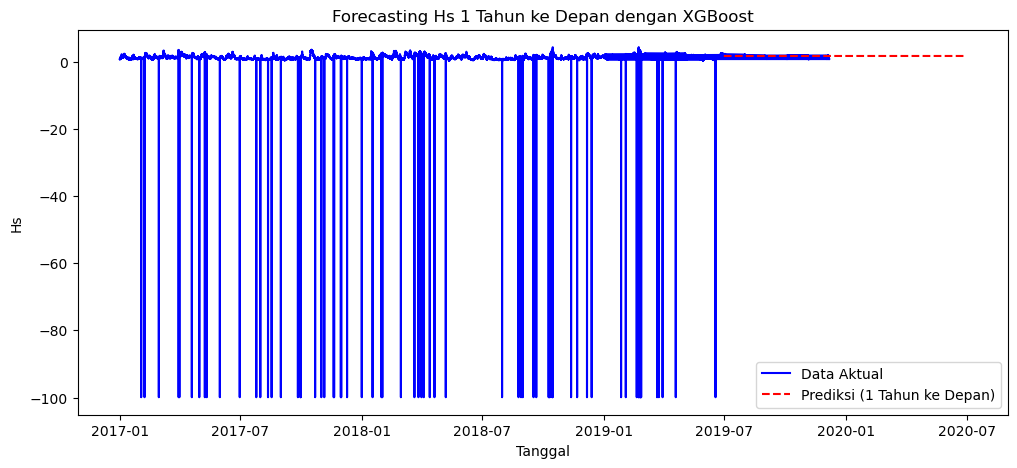

In [126]:

plt.figure(figsize=(12, 5))
plt.plot(df.index, df[target_col], label="Data Aktual", color="blue")
plt.plot(future_dates, future_predictions, label="Prediksi (1 Tahun ke Depan)", color="red", linestyle="dashed")
plt.xlabel("Tanggal")
plt.ylabel(target_col)
plt.title(f"Forecasting {target_col} 1 Tahun ke Depan dengan XGBoost")
plt.legend()
plt.show()

In [128]:
df.replace([-99.9, -99.90, -100], np.nan, inplace=True)
df.dropna(subset=["Hs"], inplace=True)  # drop baris dengan Hs = NaN


In [131]:
df = df[df["Hs"] >= 0]


In [133]:
print("Min Hs:", df["Hs"].min())
print("Max Hs:", df["Hs"].max())


Min Hs: 0.294
Max Hs: 4.257


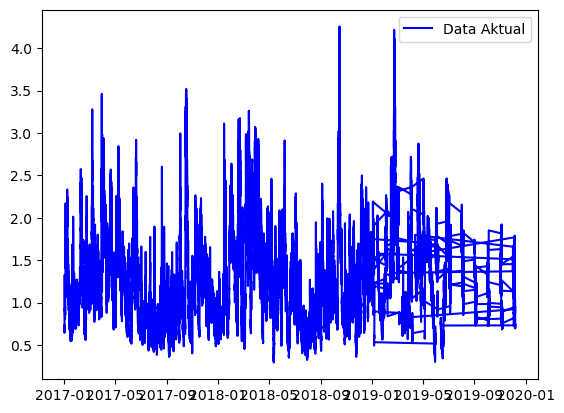

In [135]:
plt.plot(df.index, df["Hs"], color="blue", label="Data Aktual")
plt.legend()
plt.show()


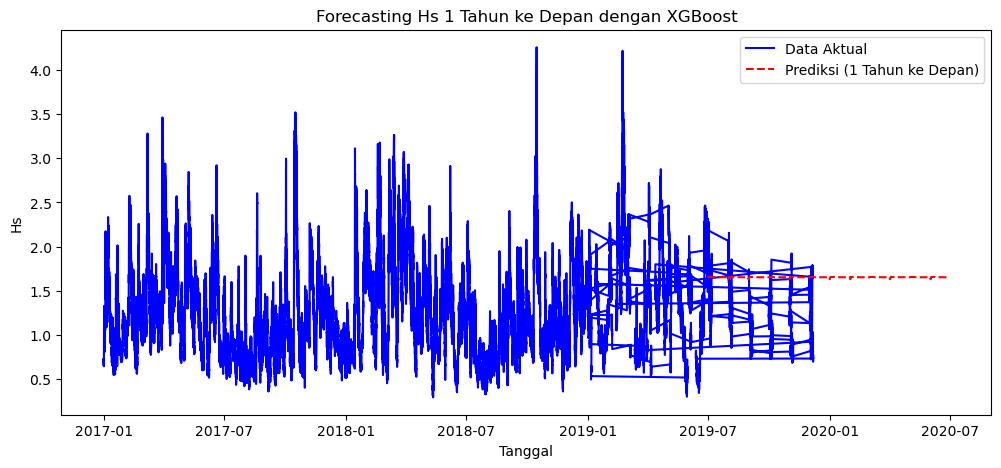

In [137]:

plt.figure(figsize=(12, 5))
plt.plot(df.index, df[target_col], label="Data Aktual", color="blue")
plt.plot(future_dates, future_predictions, label="Prediksi (1 Tahun ke Depan)", color="red", linestyle="dashed")
plt.xlabel("Tanggal")
plt.ylabel(target_col)
plt.title(f"Forecasting {target_col} 1 Tahun ke Depan dengan XGBoost")
plt.legend()
plt.show()